NOTEBOOK TO ANALYZE BITCOIN PRICES AGAINST GOLD PRICES, INFLATION, ECONOMIC UNCERTAINTY, STOCK MARKET

In [66]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.dates as mdates
import scipy.stats as sts

In [150]:
# Open Bitcoin price csv
crypto_path = os.path.join("Crypto_Prices_with_Change.csv")
crypto_only = pd.read_csv(crypto_path)
crypto_only = crypto_only.set_index('Date')
crypto_only

,BTC_Price,BTC_Change,BTC_pct_Change
Date,,,
2/1/2013,20.560734,0.000000,0.000000
2/2/2013,19.988757,-0.571977,-2.781890
2/3/2013,20.746864,0.758107,3.792668
2/4/2013,20.522662,-0.224202,-1.080654
2/5/2013,20.763715,0.241054,1.174573
...,...,...,...
1/27/2021,30473.421730,-1826.800703,-5.655691
1/28/2021,33569.649720,3096.227995,10.160421
1/29/2021,34557.161030,987.511312,2.941679


In [208]:
# Filter crypto data to look at volatility and later create histograms; get some basic statistics

# btc_positive_change = crypto_only.loc[crypto_only.loc[:,'BTC_pct_Change']<0,:].count()
# btc_positive_change
# num_positive_changes = btc_positive_change.count('BTC_pct_Change')
# avg_positive_change = btc_positive_change.mean('BTC_pct_Change')
# print(f'The mean of {num_positive_changes} positive daily percent change in BTC price for 2013-2021 is {avg_positive_changes}')
crypto_only.describe()

,BTC_Price,BTC_Change,BTC_pct_Change
count,2920.000000,2920.000000,2920.000000
mean,4325.423296,11.328252,0.355830
std,5630.973871,323.189371,4.508558
min,19.988757,-4118.703887,-43.640388
25%,388.617886,-13.336789,-1.284112
50%,1011.785437,1.043425,0.219184
75%,7613.312019,28.220423,2.005012
max,40694.506940,3772.476281,40.196281


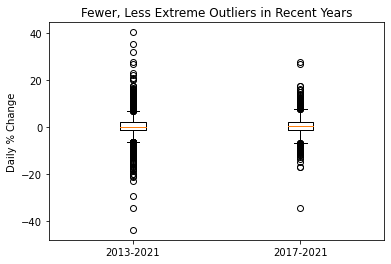

In [216]:
# Create Box plot to examine daily percent change distribution
full_btc_pct_chg_list = crypto_only['BTC_pct_Change']
recent_btc_pct_chg_list = crypto_only['BTC_pct_Change'][1459:]
btc_pct_chg_box = {'2013-2021':btc_pct_chg_list,'2017-2021':recent_btc_pct_chg_list}
fig, ax = plt.subplots()
btc_pct_chg_boxplot = ax.boxplot(btc_pct_chg_box.values())
ax.set_xticklabels(btc_pct_chg_box.keys())
ax.set_ylabel('Daily % Change')
ax.set_title('Fewer, Less Extreme Outliers in Recent Years')
fig.savefig("Figures/BTC_Pct_Change_Boxes.png")

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   2.,   3.,   5.,   4.,   7.,   4.,  19.,  29.,  49.,
         77., 133., 288., 680., 797., 352., 195., 100.,  62.,  32.,  33.,
         13.,  13.,   6.,   3.,   1.,   2.,   2.,   0.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([-43.64038825, -41.96365486, -40.28692147, -38.61018808,
        -36.93345469, -35.25672131, -33.57998792, -31.90325453,
        -30.22652114, -28.54978775, -26.87305436, -25.19632097,
        -23.51958758, -21.8428542 , -20.16612081, -18.48938742,
        -16.81265403, -15.13592064, -13.45918725, -11.78245386,
        -10.10572047,  -8.42898709,  -6.7522537 ,  -5.07552031,
         -3.39878692,  -1.72205353,  -0.04532014,   1.63141325,
          3.30814664,   4.98488003,   6.66161341,   8.3383468 ,
         10.01508019,  11.69181358,  13.36854697,  15.04528036,
         16.72201375,  18.39874714,  20.07548052,  21.75221391,
         23.428947

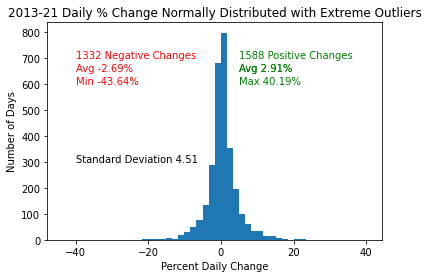

In [214]:
# Examine daily percent change distribution for cryptocurrency prices in histograms
fig, ax = plt.subplots()
btc_pct_chg_hist = ax.hist(full_btc_pct_chg_list, bins = 50)
ax.set_xlabel('Percent Daily Change')
ax.set_ylabel('Number of Days')
ax.set_title('2013-21 Daily % Change Normally Distributed with Extreme Outliers')
ax.annotate('1588 Positive Changes',(5,700),fontsize=10, color='green')
ax.annotate('Avg 2.91%',(5,650),fontsize=10,color='green')
ax.annotate('Max 40.19%',(5,600),fontsize=10,color='green')
ax.annotate('1332 Negative Changes',(-40,700),fontsize=10, color='red')
ax.annotate('Avg -2.69%',(-40,650),fontsize=10,color='red')
ax.annotate('Min -43.64%',(-40,600),fontsize=10,color='red')
ax.annotate('Avg 2.91%',(5,650),fontsize=10,color='green')
ax.annotate('Standard Deviation 4.51',(-40,300),color='black')
fig.savefig("Figures/btc_daily_change_hist.png")
btc_pct_chg_hist

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   1.,   1.,   5.,  12.,  16.,  17.,
         36.,  39.,  62.,  99., 140., 304., 271., 153., 108.,  68.,  33.,
         35.,  17.,  10.,  12.,   6.,   3.,   3.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([-34.23627161, -33.00303469, -31.76979777, -30.53656084,
        -29.30332392, -28.070087  , -26.83685008, -25.60361315,
        -24.37037623, -23.13713931, -21.90390239, -20.67066547,
        -19.43742854, -18.20419162, -16.9709547 , -15.73771778,
        -14.50448085, -13.27124393, -12.03800701, -10.80477009,
         -9.57153317,  -8.33829624,  -7.10505932,  -5.8718224 ,
         -4.63858548,  -3.40534856,  -2.17211163,  -0.93887471,
          0.29436221,   1.52759913,   2.76083606,   3.99407298,
          5.2273099 ,   6.46054682,   7.69378374,   8.92702067,
         10.16025759,  11.39349451,  12.62673143,  13.85996836,
         15.093205

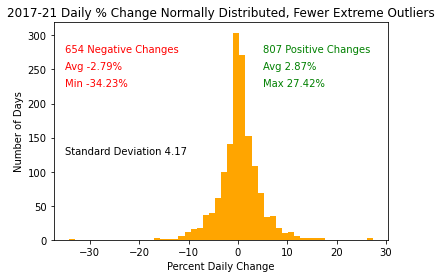

In [212]:
# Look at daily price percent change distribution only in recent years
fig, ax = plt.subplots()
recent_btc_pct_chg_hist = ax.hist(recent_btc_pct_chg_list, bins = 50,facecolor='orange')
ax.set_xlabel('Percent Daily Change')
ax.set_ylabel('Number of Days')
ax.set_title('2017-21 Daily % Change Normally Distributed, Fewer Extreme Outliers')
ax.annotate('807 Positive Changes',(5,275),fontsize=10, color='green')
ax.annotate('Avg 2.87%',(5,250),fontsize=10,color='green')
ax.annotate('Max 27.42%',(5,225),fontsize=10,color='green')
ax.annotate('Min -34.23%',(-35,225),fontsize=10,color='red')
ax.annotate('654 Negative Changes',(-35,275),fontsize=10, color='red')
ax.annotate('Avg -2.79%',(-35,250),fontsize=10,color='red')
ax.annotate('Standard Deviation 4.17',(-35,125),color='black')
fig.savefig("Figures/recent_btc_daily_change_hist.png")
recent_btc_pct_chg_hist



OBSERVATIONS: Bitcoin prices are becoming less volatile over time, with fewer extreme outliers, a shrinking standard deviation, and smaller average daily changes



In [213]:
# Cell for calculating various statistcs

# recent_btc = {'BTC_pct_Chg_Recent':recent_btc_pct_chg_list}
# recent_df = pd.DataFrame(recent_btc)
# recent_df.var()
# # recent_btc_positive_change = recent_df.loc[recent_df.loc[:,'BTC_pct_Chg_Recent']<0,:].mean()
# recent_btc_positive_change

BTC_pct_Chg_Recent    17.448426
dtype: float64

In [241]:
# Open Crypto v Gold df; get some basic statistics
gold_path = os.path.join("btc_v_gold.csv")
crypto_v_gold = pd.read_csv(gold_path)
crypto_v_gold = crypto_v_gold.drop(columns='Unnamed: 0')
crypto_v_gold = crypto_v_gold.set_index('Date')
crypto_v_gold.describe()

,BTC_Price,Gold_Price,BTC_Change,BTC_pct_Change,Gold_Change,Gold_pct_Change
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,4276.476497,1348.361679,77.566387,2.542700,0.452278,0.046512
std,5542.969938,203.281154,874.869642,12.957490,28.743054,2.037128
min,20.560734,1055.250000,-4898.759376,-33.302236,-134.000000,-8.656331
25%,382.152889,1223.500000,-37.203506,-3.858673,-14.750000,-1.103049
50%,967.790759,1286.950000,4.851709,1.282453,1.150000,0.084914
75%,7501.766756,1376.750000,100.862739,7.558582,17.150000,1.288607
max,38363.108450,2061.500000,5559.165851,94.351406,116.750000,7.760311


In [256]:
# Filter gold data to examine volatility and more recent trends
gold_only_full = crypto_v_gold[['Gold_Price','Gold_pct_Change']]
# gold_only_recent = 
gold_only_recent = gold_only_full[205:]
gold_v_btc_prices_recent = crypto_v_gold[['BTC_Price','Gold_Price']][205:]
gold_v_btc_pchg_recent = crypto_v_gold[['BTC_pct_Change','Gold_pct_Change']][205:]
gold_v_btc_pchg_recent.describe()


,BTC_pct_Change,Gold_pct_Change
count,212.000000,212.000000
mean,2.352266,0.237715
std,11.904292,1.796067
min,-33.302236,-5.859514
25%,-4.934750,-0.779399
50%,1.632534,0.193663
75%,9.195258,1.258876
max,43.280911,7.760311


<AxesSubplot:title={'center':'Gold, Bitcoin May Have Post-2017 Relationship'}, xlabel='Date', ylabel='Price ($)'>

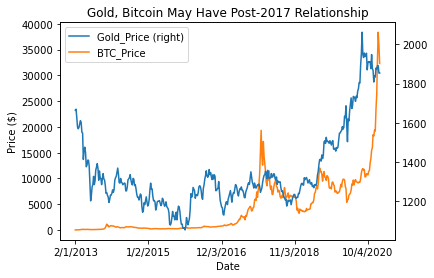

In [218]:
# Plot BTC Price vs Gold Price
btc_g_prices = crypto_v_gold[['Gold_Price','BTC_Price']]
btc_g_prices_fig = btc_g_prices.plot.line(secondary_y='Gold_Price',ylabel='Price ($)',title='Gold, Bitcoin May Have Post-2017 Relationship')
btc_g_prices_fig.figure.savefig("Figures/BTC_v_Gold_Prices.png")
btc_g_prices_fig


<AxesSubplot:title={'center':'Bitcoin Price since 2013'}, xlabel='Date', ylabel='Price ($)'>

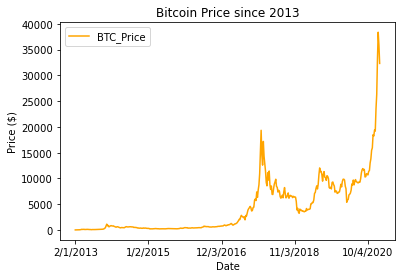

In [240]:
# Make a chart of only Bitcoin prices over time
btc_only_prices = crypto_v_gold[['BTC_Price']]
btc_only_prices_fig = btc_only_prices.plot.line(color={'BTC_Price':'orange'},ylabel='Price ($)',title='Bitcoin Price since 2013')
btc_only_prices_fig.figure.savefig("Figures/BTC_only_Prices.png")
btc_only_prices_fig

<AxesSubplot:title={'center':'Correlation Coefficieint=-0.0017923486934504872--No Correlation)'}, xlabel='Gold_pct_Change', ylabel='BTC_pct_Change'>

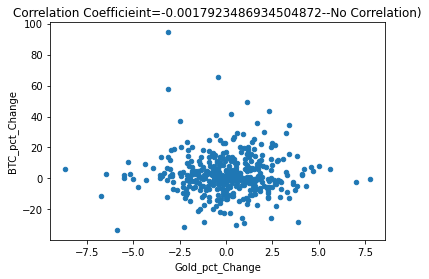

In [74]:
# Plot BTC and Gold percent changes in scatterplot
btc_g_pchg = crypto_v_gold[['BTC_pct_Change','Gold_pct_Change']]
from scipy.stats import linregress
corr_coeff = sts.pearsonr(btc_g_pchg['Gold_pct_Change'],btc_g_pchg['BTC_pct_Change'])
corr_coeff = corr_coeff[0]
btc_g_pctchg_scatter = btc_g_pchg.plot.scatter('Gold_pct_Change','BTC_pct_Change', title=f'Correlation Coefficieint={corr_coeff}--No Correlation)',xlabel='Gold % Change',ylabel='BTC % Change')
btc_g_pctchg_scatter.figure.savefig("Figures/btc_g_pctchg_scatter.png")
btc_g_pctchg_scatter

OBSERVATION: Bitcoin and Gold do appear to have some relationship, and it appears to grow stronger in more recent years.  There is no correlation, but let's filter the data down to more recent years to see if the relationship is stronger

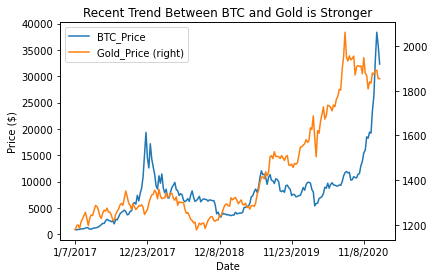

In [253]:
# Create line chart of more recent Bitcoin vs Gold Data
btc_g_prices_recent_fig = gold_v_btc_prices_recent.plot.line(secondary_y='Gold_Price',ylabel='Price ($)',title='Recent Trend Between BTC and Gold is Stronger')
btc_g_prices_recent_fig.figure.savefig("Figures/BTC_v_Gold_Prices_Recent.png")

<AxesSubplot:title={'center':'Correlation Coefficieint=0.13378235986431358--Still No Correlation)'}, xlabel='Gold_pct_Change', ylabel='BTC_pct_Change'>

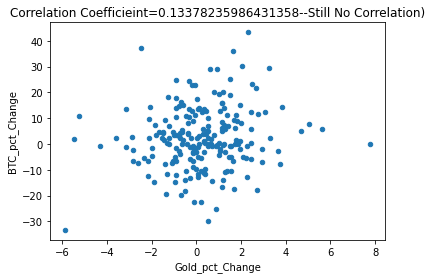

In [255]:
# Create scatter plot of more recent Bitcoin changes vs Gold changes
corr_coeff_gold = sts.pearsonr(gold_v_btc_pchg_recent['Gold_pct_Change'],gold_v_btc_pchg_recent['BTC_pct_Change'])
corr_coeff_gold = corr_coeff_gold[0]
btc_g_pctchg_recent_scatter = gold_v_btc_pchg_recent.plot.scatter('Gold_pct_Change','BTC_pct_Change', title=f'Correlation Coefficieint={corr_coeff_gold}--Still No Correlation)',xlabel='Gold % Change',ylabel='BTC % Change')
btc_g_pctchg_recent_scatter.figure.savefig("Figures/btc_g_pctchg_recent_scatter.png")
btc_g_pctchg_recent_scatter

In [277]:
# Calculations on Gold Volatility
gold_chg_only_full = gold_only_full[['Gold_pct_Change']]
gold_chg_only_recent = gold_only_recent[['Gold_pct_Change']]
gold_filter_positive = gold_chg_only_recent.loc[gold_chg_only_full.loc[:,'Gold_pct_Change']>0,:].mean()
gold_filter_negative = gold_chg_only_recent.loc[gold_chg_only_full.loc[:,'Gold_pct_Change']<0,:].mean()
gold_filter_positive

Gold_pct_Change    1.411596
dtype: float64

(array([ 1.,  0.,  2.,  3.,  4.,  3., 16., 23., 43., 59., 85., 64., 57.,
        29., 14.,  8.,  3.,  1.,  0.,  2.]),
 array([-8.65633075, -7.83549866, -7.01466657, -6.19383448, -5.37300238,
        -4.55217029, -3.7313382 , -2.91050611, -2.08967402, -1.26884193,
        -0.44800984,  0.37282226,  1.19365435,  2.01448644,  2.83531853,
         3.65615062,  4.47698271,  5.2978148 ,  6.11864689,  6.93947899,
         7.76031108]),
 <BarContainer object of 20 artists>)

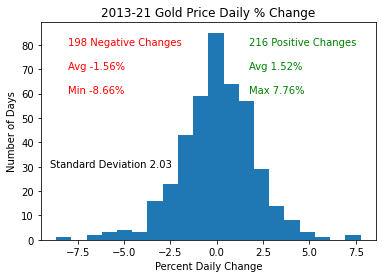

In [271]:
# Histogram to examine gold price changes 2013 to 2021
fig, ax = plt.subplots()
gold_pct_chg_hist = ax.hist(gold_chg_only_full, bins = 20)
ax.set_xlabel('Percent Daily Change')
ax.set_ylabel('Number of Days')
ax.set_title('2013-21 Gold Price Daily % Change')
ax.annotate('216 Positive Changes',(1.75,80),fontsize=10, color='green')
ax.annotate('Avg 1.52%',(1.75,70),fontsize=10,color='green')
ax.annotate('Max 7.76%',(1.75,60),fontsize=10,color='green')
ax.annotate('198 Negative Changes',(-8,80),fontsize=10, color='red')
ax.annotate('Avg -1.56%',(-8,70),fontsize=10,color='red')
ax.annotate('Min -8.66%',(-8,60),fontsize=10,color='red')
ax.annotate('Standard Deviation 2.03',(-9,30),color='black')
fig.savefig("Figures/gold_daily_change_hist.png")
gold_pct_chg_hist

(array([ 1.,  0.,  2.,  3.,  4.,  3., 16., 23., 43., 59., 85., 64., 57.,
        29., 14.,  8.,  3.,  1.,  0.,  2.]),
 array([-8.65633075, -7.83549866, -7.01466657, -6.19383448, -5.37300238,
        -4.55217029, -3.7313382 , -2.91050611, -2.08967402, -1.26884193,
        -0.44800984,  0.37282226,  1.19365435,  2.01448644,  2.83531853,
         3.65615062,  4.47698271,  5.2978148 ,  6.11864689,  6.93947899,
         7.76031108]),
 <BarContainer object of 20 artists>)

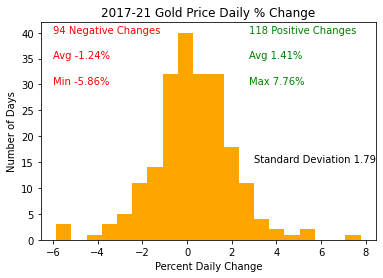

In [282]:
# Histogram to examine changes in Gold price in recent years
fig, ax = plt.subplots()
gold_pct_chg_hist_recent = ax.hist(gold_chg_only_recent, bins = 20, facecolor='orange')
ax.set_xlabel('Percent Daily Change')
ax.set_ylabel('Number of Days')
ax.set_title('2017-21 Gold Price Daily % Change')
ax.annotate('118 Positive Changes',(2.75,40),fontsize=10, color='green')
ax.annotate('Avg 1.41%',(2.75,35),fontsize=10,color='green')
ax.annotate('Max 7.76%',(2.75,30),fontsize=10,color='green')
ax.annotate('94 Negative Changes',(-6,40),fontsize=10, color='red')
ax.annotate('Avg -1.24%',(-6,35),fontsize=10,color='red')
ax.annotate('Min -5.86%',(-6,30),fontsize=10,color='red')
ax.annotate('Standard Deviation 1.79',(3,15),color='black')
fig.savefig("Figures/gold_pct_change_hist_recent.png")
gold_pct_chg_hist

In [118]:
# Open Crypto v Stocks df
stock_path = os.path.join("crypto_v_stockmarket.csv")
crypto_v_stocks = pd.read_csv(stock_path)
crypto_v_stocks = crypto_v_stocks.set_index('Date')
crypto_v_stocks

,DJIA_Close,DJIA_Change,DJIA_pct_Change,NDAQ_Close,NDAQ_Change,NDAQ_pct_Change,BTC_Price,BTC_Change,BTC_pct_Change
Date,,,,,,,,,
2/1/2013,14009.79,0.00,0.000000,3179.10,0.00,0.000000,20.560734,0.000000,0.000000
2/4/2013,13880.08,-129.71,-0.925853,3131.17,-47.93,-0.015077,20.522662,-0.224202,-1.080654
2/5/2013,13979.30,99.22,0.714837,3171.58,40.41,0.012906,20.763715,0.241054,1.174573
2/6/2013,13986.52,7.22,0.051648,3168.48,-3.10,-0.000977,21.272281,0.508565,2.449298
2/7/2013,13944.05,-42.47,-0.303650,3165.13,-3.35,-0.001057,22.144725,0.872444,4.101318
...,...,...,...,...,...,...,...,...,...
9/9/2020,27940.47,439.58,1.598421,11141.56,293.87,0.027091,10264.652010,69.980012,0.686437
9/10/2020,27534.58,-405.89,-1.452696,10919.59,-221.97,-0.019923,10408.177220,143.525209,1.398247
9/11/2020,27665.64,131.06,0.475983,10853.55,-66.04,-0.006048,10422.242550,14.065334,0.135137


<AxesSubplot:title={'center':'DJIA, Bitcoin May Have Post-2016 Relationship'}, xlabel='Date'>

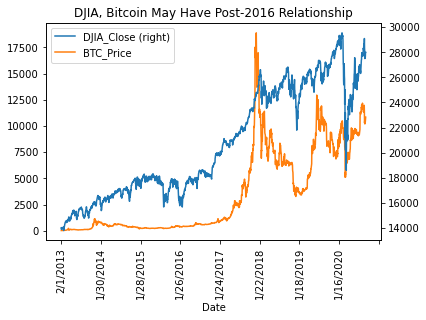

In [220]:
# Create Bitcoin vs DJIA trend chart
btc_v_djia = crypto_v_stocks[['DJIA_Close','BTC_Price']]
btc_v_dow_fig = btc_v_djia.plot.line(secondary_y='DJIA_Close',rot='vertical',title='DJIA, Bitcoin May Have Post-2016 Relationship')
btc_v_dow_fig.figure.savefig("Figures/btc_v_dow.png")
btc_v_dow_fig
# btc_v_djia
#### ADD STYLE AND SAVEFIG ####
#### FURTHER ANALYZE FROM 2017 SPIKE, FORWARD ####

<AxesSubplot:title={'center':'Correlation Coefficieint=0.06898279131930986--No Correlation)'}, xlabel='DJIA_pct_Change', ylabel='BTC_pct_Change'>

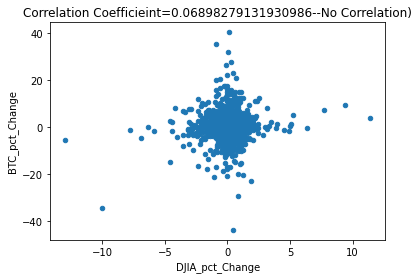

In [221]:
# Create Bitcoin vs DJIA daily change scatter plot
btc_v_djia_chg = crypto_v_stocks[['DJIA_pct_Change','BTC_pct_Change']]
corr_r = sts.pearsonr(btc_v_djia_chg['DJIA_pct_Change'],btc_v_djia_chg['BTC_pct_Change'])
corr_r = corr_r[0]
btc_djia_chg_scatter_fig = btc_v_djia_chg.plot.scatter('DJIA_pct_Change','BTC_pct_Change', title=f'Correlation Coefficieint={corr_r}--No Correlation)',xlabel='DJIA % Change',ylabel='BTC % Change')
btc_djia_chg_scatter_fig.figure.savefig("Figures/dow_v_btc_scatter.png")
btc_djia_chg_scatter_fig

<AxesSubplot:title={'center':'NASDAQ, Bitcoin May Have Post-2017 Relationship'}, xlabel='Date'>

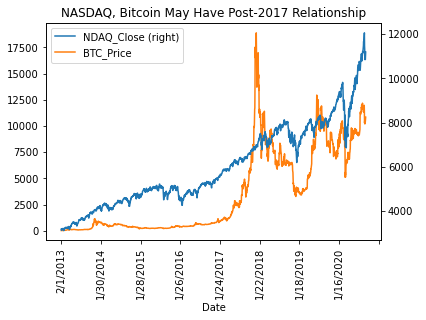

In [223]:
# Create Bitcoin vs NASDAQ line chart to examine trends
btc_v_ndaq = crypto_v_stocks[['NDAQ_Close','BTC_Price']]
btc_v_ndaq_fig = btc_v_ndaq.plot.line(secondary_y='NDAQ_Close',rot='vertical',title='NASDAQ, Bitcoin May Have Post-2017 Relationship')
btc_v_ndaq_fig.figure.savefig("Figures/btc_v_ndaq.png")
btc_v_ndaq_fig

OBSERVATION: There appear to be some loose relationshps between Bitcoin and both the Dow Jones Industrial Average and NASDAQ.  Like with gold, the relationship has grown stronger since the 2017 price spike

In [123]:
# Open Crypto v Inflation df
inf_path = os.path.join("Crypto_v_Inflation.csv")
crypto_v_inf = pd.read_csv(inf_path)
crypto_v_inf = crypto_v_inf.set_index('Date')
crypto_v_inf

,Inflation Value (1984=100),Monthly Change (%),BTC_Price,BTC_Pct_Change
Date,,,,
2013-02,232.166,0.8,33.853477,0.000000
2013-03,232.773,0.3,93.797805,177.069933
2013-04,232.531,-0.1,139.883753,49.133291
2013-05,232.945,0.2,127.946514,-8.533685
2013-06,233.504,0.2,89.735161,-29.865098
...,...,...,...,...
2020-08,259.918,0.3,11670.626560,2.793402
2020-09,260.280,0.1,10784.411020,-7.593556
2020-10,260.388,0.0,13893.465730,28.829156


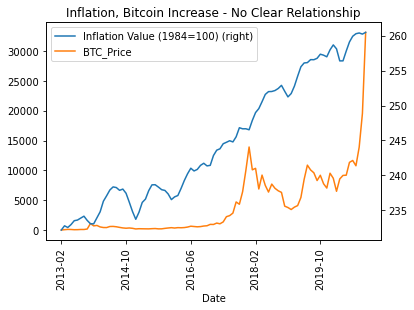

In [224]:
# Create Bitcoin vs Inflation line chart to examine trends
btc_v_infl = crypto_v_inf[['Inflation Value (1984=100)','BTC_Price']]
btc_v_infl_fig = btc_v_infl.plot.line(secondary_y='Inflation Value (1984=100)',rot='vertical',title='Inflation, Bitcoin Increase - No Clear Relationship')
btc_v_infl_fig.figure.savefig("Figures/btc_v_infl.png")

In [126]:
# Open Crypto v Economic Uncertainty df
unc_path = os.path.join("Crypto_v_Uncertainty.csv")
crypto_v_uncertainty = pd.read_csv(unc_path)
crypto_v_uncertainty = crypto_v_uncertainty.set_index('Date')
crypto_v_uncertainty

,Economic Policy Uncertainty,Monetary policy,Government spending,National security,Financial Regulation,"Sovereign debt, currency crises",BTC_Price,BTC_Pct_Change
Date,,,,,,,,
3/1/2013,127.907071,74.678109,261.072394,67.232097,76.095169,243.156035,33.853477,0.000000
4/1/2013,77.201711,34.016665,72.652522,38.559536,47.961099,28.380715,93.797805,177.069933
5/1/2013,71.645563,35.081088,53.429494,31.160853,37.286633,27.580198,139.883753,49.133291
6/1/2013,77.763068,55.337061,57.108591,36.726217,89.548832,38.213961,127.946514,-8.533685
7/1/2013,86.720342,51.459549,71.349203,91.145834,153.359947,15.468733,89.735161,-29.865098
...,...,...,...,...,...,...,...,...
9/1/2020,225.148692,124.028643,97.974717,137.845947,102.927451,137.040186,11670.626560,2.793402
10/1/2020,255.857027,108.102130,119.907785,95.426135,136.676648,75.822797,10784.411020,-7.593556
11/1/2020,252.119123,146.897536,147.805234,169.058055,101.620142,71.210317,13893.465730,28.829156


In [133]:
# Create smaller dfs for analysis
btc_v_policy = crypto_v_uncertainty[['Economic Policy Uncertainty','BTC_Price']]
btc_v_monetary = crypto_v_uncertainty[['Monetary policy','BTC_Price']]
btc_v_govspnd = crypto_v_uncertainty[['Government spending','BTC_Price']]
btc_v_natsec = crypto_v_uncertainty[['National security','BTC_Price']]
btc_v_finreg = crypto_v_uncertainty[['Financial Regulation','BTC_Price']]
btc_v_debt = crypto_v_uncertainty[['Sovereign debt, currency crises','BTC_Price']]
btc_v_debt

,"Sovereign debt, currency crises",BTC_Price
Date,,
3/1/2013,243.156035,33.853477
4/1/2013,28.380715,93.797805
5/1/2013,27.580198,139.883753
6/1/2013,38.213961,127.946514
7/1/2013,15.468733,89.735161
...,...,...
9/1/2020,137.040186,11670.626560
10/1/2020,75.822797,10784.411020
11/1/2020,71.210317,13893.465730


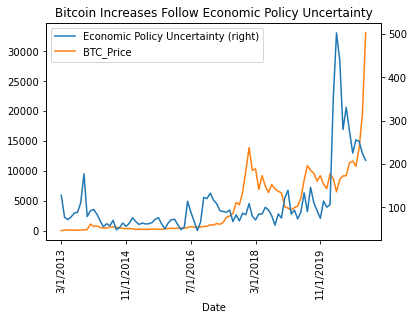

In [225]:
# Create Bitcoin vs. Economic Policy Uncertainty line chart
btc_v_policy_fig = btc_v_policy.plot.line(secondary_y='Economic Policy Uncertainty',rot='vertical',title='Bitcoin Increases Follow Economic Policy Uncertainty')
btc_v_policy_fig.figure.savefig("Figures/btc_v_policy_uncertainty.png")

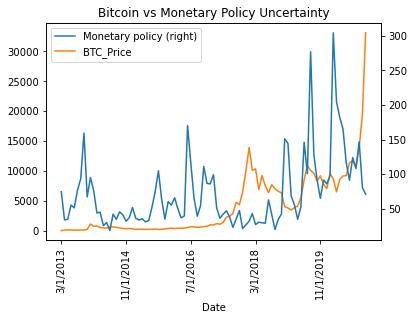

In [226]:
# Create Bitcoin vs Monetary Policy Uncertainty line chart
btc_v_monetary_fig = btc_v_monetary.plot.line(secondary_y='Monetary policy',rot='vertical',title='Bitcoin vs Monetary Policy Uncertainty')
btc_v_monetary_fig.figure.savefig("Figures/btc_v_monetary_uncertainty.png")

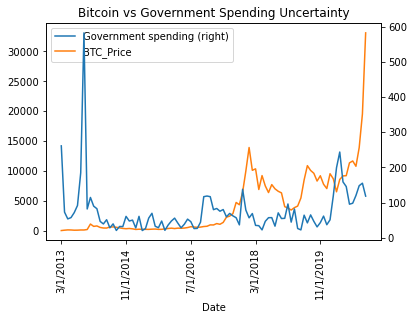

In [227]:
# Create Bitcoin vs Government Spending Uncertainty Line Chart
btc_v_govspend_fig = btc_v_govspnd.plot.line(secondary_y='Government spending',rot='vertical',title='Bitcoin vs Government Spending Uncertainty')
btc_v_govspend_fig.figure.savefig("Figures/btc_v_govspend_uncertainty.png")

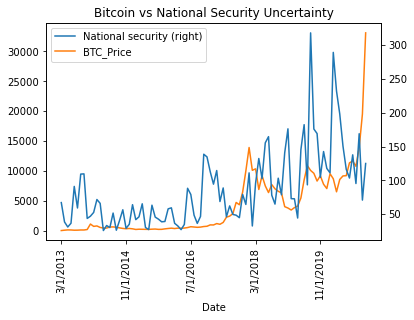

In [228]:
# Create Bitcoin vs National Security Uncertainty line chart
btc_v_natsec_fig = btc_v_natsec.plot.line(secondary_y='National security',rot='vertical',title='Bitcoin vs National Security Uncertainty')
btc_v_natsec_fig.figure.savefig("Figures/btc_v_natsec_uncertainty.png")

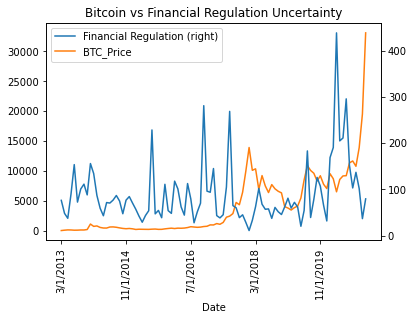

In [229]:
# Create Bitcoin vs Financial Regulation Uncertainty Line Chart
btc_v_finreg_fig = btc_v_finreg.plot.line(secondary_y='Financial Regulation',rot='vertical',title='Bitcoin vs Financial Regulation Uncertainty')
btc_v_finreg_fig.figure.savefig("Figures/btc_v_finreg_uncertainty.png")

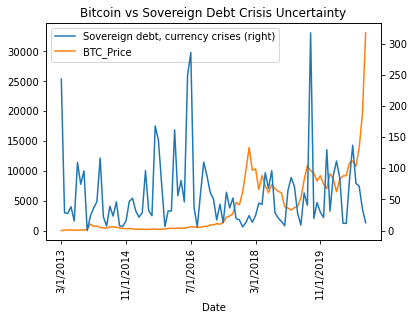

In [230]:
# Create Bitcoin vs. Sovereign Debt Crisis Uncertainty line chart
btc_v_debt_fig = btc_v_debt.plot.line(secondary_y='Sovereign debt, currency crises',rot='vertical',title='Bitcoin vs Sovereign Debt Crisis Uncertainty')
btc_v_debt_fig.figure.savefig("Figures/btc_v_debt_uncertainty.png")
##### ADD STYLE, SAVEFIG AND DEEPER ANALYSIS ####

In [144]:
# Open Crypto v Twitter Uncertainty df
twit_path = os.path.join("Crypto_v_Twitter.csv")
crypto_v_twitter = pd.read_csv(twit_path)
crypto_v_twitter = crypto_v_twitter.set_index('Date')
crypto_v_twitter

,BTC_Price,BTC_Change,BTC_pct_Change,TEU
Date,,,,
2/1/2013,20.560734,0.000000,0.000000,101.457894
2/2/2013,19.988757,-0.571977,-2.781890,26.352700
2/3/2013,20.746864,0.758107,3.792668,27.670335
2/4/2013,20.522662,-0.224202,-1.080654,80.375734
2/5/2013,20.763715,0.241054,1.174573,94.869719
...,...,...,...,...
9/11/2020,10422.242550,14.065334,0.135137,260.891728
9/12/2020,10467.738260,45.495707,0.436525,150.210389
9/13/2020,10367.465390,-100.272869,-0.957923,142.304579


In [235]:
# Create smaller dfs for analysis
btc_v_twitter = crypto_v_twitter[['TEU','BTC_Price']]
btc_v_twitter

,TEU,BTC_Price
Date,,
2/1/2013,101.457894,20.560734
2/2/2013,26.352700,19.988757
2/3/2013,27.670335,20.746864
2/4/2013,80.375734,20.522662
2/5/2013,94.869719,20.763715
...,...,...
9/11/2020,260.891728,10422.242550
9/12/2020,150.210389,10467.738260
9/13/2020,142.304579,10367.465390


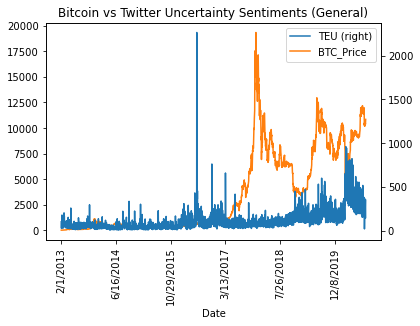

In [236]:
# Create Bitcoin vs. Twitter Uncertainty line chart
btc_v_twit_fig = btc_v_twitter.plot.line(secondary_y='TEU',rot='vertical',title='Bitcoin vs Twitter Uncertainty Sentiments (General)')
btc_v_twit_fig.figure.savefig("Figures/btc_v_twitter_uncertainty.png")
##### ADD STYLE, SAVEFIG AND DEEPER ANALYSIS ####